#### Sinjini Ghosh

### Aim: To implement an object detector which identifies the classes of objects

In [2]:
import cv2
# OpenCV: Library of programming functions mainly aimed at real time computer vision

import matplotlib.pyplot as plt

We need to import pre-trained neural network architecture based on tensorflow. 

Following is the link from where the pre-trained neural network architecture can be downloaded:
https://gist.github.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7

Version :- mobilenet SSD version 3 

The architectures are based on tensorflow, but we will use OpenCV to load them.



In [3]:
# Importing the configuration files and graph of the frozen inference
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

# frozen_model: Graph of the deep learning architecture

In [4]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

# Using the dnn detection model 

The dataset used is known as the "coco dataset". It has 80 classes. 

Link to the dataset: https://github.com/pjreddie/darknet/blob/master/data/coco.names

I have copy-pasted the 80 classes to a .txt file, which will be used in this program. 
labels.txt is the text file that contains the names of the classes. The following code loads all the classes in a list 'classlabels'

In [8]:
classlabels = []
file_name = "labels.txt"
with open(file_name, "rt") as file:
    classlabels = file.read().rstrip("\n").split("\n")

In [12]:
print(classlabels)

# the list of classes that the model can recognise

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [13]:
print(len(classlabels))

80


In [11]:
# Setting the model configurations

model.setInputSize(320, 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)
# InputSwapRB automatically converts an image from the BGR to RGB format

<dnn_Model 000001B8F67E6DD0>

### Reading an image

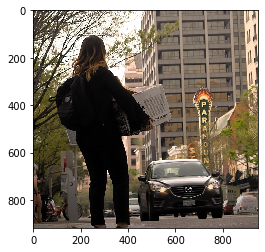

In [14]:
img = plt.imread("city.jpg")
plt.imshow(img)

# loading the image. The image is in RGB format

In [19]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.55)

ClassIndex is the index of the classes detected according to the text file 'labels'

confidence is the extent to which the predicted classes are correct

bbox is used for drawing the rectangle around the objects

confThreshold = 0.55 implies that the model ignores the classes that are predicted with less than 55% confidence

In [22]:
print(ClassIndex)

[[3]
 [1]
 [3]]


In [24]:
font_scale = 3  
font = cv2.FONT_HERSHEY_COMPLEX  # setting the font


# Iterating over the three arrays: ClassIndex, confidence, bbox
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)      # To draw the rectangles around the objects
    cv2.putText(img, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color = (0, 0, 255), thickness = 3)
    # To write the names of the classes

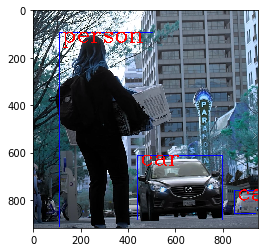

In [26]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# To print the image containing the class labels